## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [7]:
# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
mice_count = all_data['Mouse ID'].nunique()
mice_count

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_mice = all_data.groupby(by=['Mouse ID'])
#group_mice.head()

In [33]:
# How many unique timepoints
unique_timepoint = group_mice["Timepoint"].nunique()

In [11]:
# How many timepoints
count_timepoint = group_mice["Timepoint"].count()

In [12]:
#Compare both results
compare = unique_timepoint.compare(count_timepoint)
compare

,self,other
Mouse ID,,
g989,8.0,13.0


In [13]:
# take ID
duplicateID = compare.index[0]

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = all_data.loc[all_data['Mouse ID'] == duplicateID, :]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = all_data

In [36]:
# .LOC duplicate
to_drop = data_cleaned.loc[all_data['Mouse ID'] == duplicateID, :]
to_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# take index for .drop
index_to_drop = to_drop.index
index_to_drop

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [42]:
# DROP
data_cleaned = data_cleaned.drop(index=index_to_drop)

In [43]:
# check 
data_cleaned.loc[all_data['Mouse ID'] == duplicateID, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [44]:
# Checking the number of mice in the clean DataFrame.
mice_count_2 = data_cleaned['Mouse ID'].nunique()
mice_count_2

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

data_by_regime = data_cleaned.groupby(["Drug Regimen"])
tumor_by_regime = data_by_regime["Tumor Volume (mm3)"]

In [59]:
mean = tumor_by_regime.mean()
median = tumor_by_regime.median()
variance = tumor_by_regime.var()
std_dev = tumor_by_regime.std()
sem = tumor_by_regime.sem()

In [60]:
summary_statistics = pd.DataFrame({"Mean": mean,
                                  "Median": median,
                                  "Variance": variance,
                                  "Standard Deviation": std_dev,
                                  "Standard Error Mean": sem})
summary_statistics

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# Summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary = tumor_by_regime.agg(["mean","median","var","std","sem"])

In [62]:
aggregation_summary.rename(columns={"mean":"Mean","median":"Median","var":"Variance",
                                    "std":"Standard Deviation","sem":"Standard Error Mean"},inplace=True)
aggregation_summary

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using Pandas.
regime_time_count = data_by_regime["Timepoint"].count()

<AxesSubplot:title={'center':'Number of timepoints for each drug regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

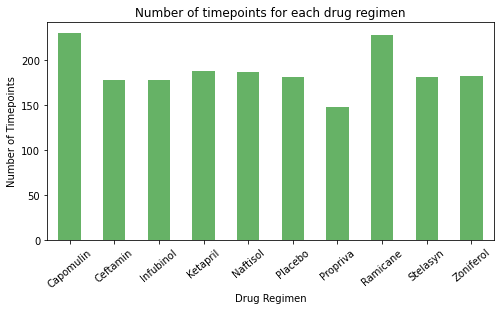

In [139]:
regime_time_count.plot(kind="bar",
                       figsize=(8,4),
                       rot=40,
                       title="Number of timepoints for each drug regimen",
                       ylabel="Number of Timepoints",
                       color="green", alpha=0.6)

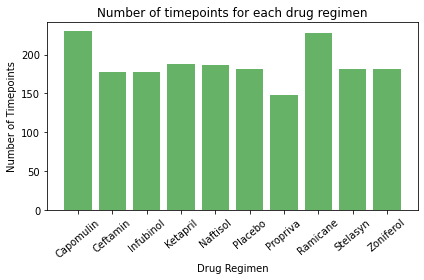

In [138]:
# Bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using pyplot.
plt.bar(regime_time_count.index,regime_time_count,color="green",alpha=0.6)
plt.xticks(regime_time_count.index,rotation=40)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of timepoints for each drug regimen")
plt.tight_layout()
plt.show()

In [125]:
# Ppie plot showing the distribution of female versus male mice using Pandas
group_by_sex = data_cleaned.loc[data_cleaned["Timepoint"]==0].groupby("Sex")["Mouse ID"].count()
group_by_sex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Distribution of female versus male mice'}>

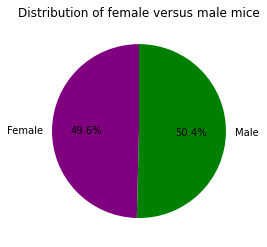

In [136]:
group_by_sex.plot(kind="pie",
                  figsize=(8,4),
                  title="Distribution of female versus male mice",
                  ylabel="",
                  autopct="%1.1f%%",
                  startangle=90,
                  colors=["purple","green"])

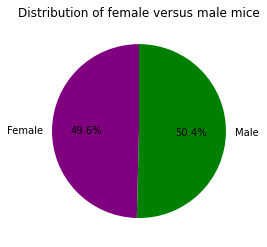

In [141]:
# Pie plot showing the distribution of female versus male mice using pyplot
plt.pie(group_by_sex,
        labels=group_by_sex.index,
        autopct="%1.1f%%",
        colors=["purple","green"],
        startangle=90)
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [147]:
# final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Last (greatest) timepoint for each mouse:
time_max = data_cleaned.groupby(["Mouse ID"]).max()[["Timepoint"]]
time_max = time_max.reset_index()
time_max

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [159]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_max = pd.merge(time_max,data_cleaned,on=["Mouse ID","Timepoint"])
merged_data_max.count()

Mouse ID              248
Timepoint             248
Drug Regimen          248
Sex                   248
Age_months            248
Weight (g)            248
Tumor Volume (mm3)    248
Metastatic Sites      248
dtype: int64

In [160]:
merged_data_max = merged_data_max.loc[(merged_data_max["Drug Regimen"]=="Capomulin")|
                                        (merged_data_max["Drug Regimen"]=="Ramicane")|
                                        (merged_data_max["Drug Regimen"]=="Infubinol")|
                                        (merged_data_max["Drug Regimen"]=="Ceftamin")]
merged_data_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [166]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_data_max["Drug Regimen"].unique()
treatments

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [192]:
# empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    #look for treatment in df
    data_by_treat = merged_data_max.loc[merged_data_max["Drug Regimen"] == treatment]
    #describe to take quartiles
    quart = data_by_treat["Tumor Volume (mm3)"].describe()
    lowerq = quart["25%"]
    median = quart["50%"] 
    upperq = quart["75%"]
    lowest = quart["min"]
    highest = quart["max"]
    iqr = upperq - lowerq
    
    q_dict = {"Treatment": treatment, 
                "Q0": round(lowest,2), 
                "Q1": round(lowerq,2), 
                "Q2": round(median,2), 
                "Q3": round(upperq,2), 
                "Q4": round(highest,2)}   
    tumor_vol_data.append(q_dict)
    
    # Determine outliers using upper and lower bounds
    upperbound = upperq + (1.5*iqr)
    lowerbound = lowerq - (1.5*iqr)
    outliers.append(data_by_treat.loc[
        (data_by_treat["Tumor Volume (mm3)"]>upperbound)|
        (data_by_treat["Tumor Volume (mm3)"]<lowerbound)]
                         )    
tumor_vol_data_df = pd.DataFrame(tumor_vol_data)
tumor_vol_data_df

,Treatment,Q0,Q1,Q2,Q3,Q4
0,Infubinol,36.32,54.05,60.17,65.53,72.23
1,Ceftamin,45.00,48.72,59.85,64.30,68.92
2,Ramicane,22.05,31.56,36.56,40.66,45.22
3,Capomulin,23.34,32.38,38.13,40.16,47.69


In [194]:
out_df=outliers[0]
out_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


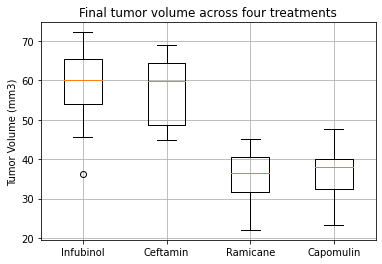

In [202]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
vol_by_treatment=[]
for treatment in treatments:
    vol_by_treatment.append(
        merged_data_max.loc[merged_data_max["Drug Regimen"] == treatment]["Tumor Volume (mm3)"])
plt.boxplot(vol_by_treatment,showmeans=False)
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(1,len(treatments)+1),treatments)
plt.title("Final tumor volume across four treatments")
plt.grid()
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
